In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand
import pandas as pd

from lib.graphs import G_Witvliet, G_White, getCleanGraph
G_W1 = G_Witvliet[0]
G_W7 = G_Witvliet[6]
G_W8 = G_Witvliet[7]

G_clean = getCleanGraph()

G_SEEM_FC = nx.read_gexf('data/Kaiser/131/compiled/xyzp_d_SEEM_FC.gexf')


In [21]:
%store -r rand_Graphs_W1
%store -r rand_Graphs_W7
%store -r rand_Graphs_W8
%store -r rand_Graphs_White

%store -r RDDAM_Graphs_W1
%store -r RDDAM_Graphs_W7
%store -r RDDAM_Graphs_W8
%store -r RDDAM_Graphs_White

%store -r G_SEEM_FC
%store -r SEEM_White
%store -r SEEM_Array_Witvliet

In [22]:
def avgDistance(G):
  distances = [e[2] for e in G.out_edges.data('distance')]
  return np.mean(distances)

In [59]:
#clustering coefficient

def averageMetric(graphs, metric):
  outputs = np.array([])
  for g in graphs:
    out = metric(g)
    outputs = np.append(outputs, out)
  return np.mean(outputs)

def getData(metric):
  res_SEEM_W1 = averageMetric(SEEM_Array_Witvliet[0], metric)
  res_SEEM_W8 = averageMetric(SEEM_Array_Witvliet[7], metric)
  res_W1 = metric(G_W1)
  res_W8 = averageMetric([G_W7,G_W8, G_White], metric)
  res_rand_W1 = averageMetric(rand_Graphs_W1, metric)
  res_rand_W8 = averageMetric(rand_Graphs_W8, metric)
  res_RDDA_W1 = averageMetric(RDDAM_Graphs_W1, metric)
  res_RDDA_W8 = averageMetric(RDDAM_Graphs_W8, metric)
  
  return [res_SEEM_W1, res_RDDA_W1, res_rand_W1, res_W1, res_SEEM_W8, res_RDDA_W8, res_rand_W8, res_W8]


In [24]:
def biDirectionalLinks(G):
  n_links = 0
  for e in G.edges():
    if (e[1], e[0]) in G.edges():
      n_links += 1
  return ( n_links / 2 )

In [25]:
def avgInDegree(G):
  return np.mean(list(dict(G.in_degree()).values()))
  
def avgOutDegree(G):
  return np.mean(list(dict(G.out_degree()).values()))

def avgDegree(G):
  return np.mean(list(dict(G.degree()).values()))

def avgClosenessCentrality(G):
  return np.mean(list(nx.closeness_centrality(G).values()))

In [58]:
print('Clustering\\Coefficient')

Clustering\Coefficient


In [69]:

data = {'Clustering Coefficient': getData(nx.average_clustering),
'Edge Distance': getData(avgDistance),
# 'In-Degree Centrality': getData(avgInDegree, 'IN-DEGREE'),
# 'Out-Degree Centrality': getData(avgOutDegree, 'OUT-DEGREE'),
# 'Closeness Centrality': getData(avgClosenessCentrality, 'CLOSENESS CENTRALITY'),
'Total Bidirectional Links': getData(biDirectionalLinks)}

In [61]:
modelNames = ('SEEM','RDDA','ERN','CENN')
dataSources = ('L1', 'Adult')

rowLabels = [(d, m) for d in dataSources for m in modelNames]

index = pd.MultiIndex.from_tuples(rowLabels) #, names=['Data', 'Model']

In [78]:
df = pd.DataFrame(data=data, index=index)
df.to_excel('data/spreadsheets/data.xlsx')
df

\thead{Clustering\\Coefficient}  \thead{Edge\\Distance}  \
L1    SEEM                         0.036307               17.593802   
      RDDA                         0.136219                6.607809   
      ERN                          0.028589               19.152152   
      CENN                         0.115779               15.327489   
Adult SEEM                         0.090883               17.589113   
      RDDA                         0.253409                7.550171   
      ERN                          0.070523               19.193761   
      CENN                         0.197319               15.170374   

            \thead{Total\\Bidirectional\\Links}  
L1    SEEM                            11.169000  
      RDDA                            82.841000  
      ERN                              6.943000  
      CENN                            50.000000  
Adult SEEM                            68.313000  
      RDDA                           284.917000  
      ERN                             42.652000  
      CENN                           150.333333

In [101]:
texColumns = ['\\thead{'+ k.replace(' ', '\\\\') +'}' for k in data.keys()]
dataTex = {texColumns[i]:list(data.values())[i] for i in range(len(texColumns))}
dfTex = pd.DataFrame(data=dataTex, index=index)
dfTex.style.to_latex('data/spreadsheets/data.tex', column_format='|c|c||c|c|c|', hrules=True, clines='skip-last;data') #clines='skip-last;index'
dfTex.style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    {'selector': 'bottomrule', 'props': ':hline;'},
], overwrite=False);

## Violin Plots

In [ ]:
colors = {
    'SEEM': '#1f77b4',
    'RDDA': '#ff7f0e',
    'ERN': '#2ca02c',
    'REEM': '#9467bd',
}

In [ ]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)

def listMetric(graphs, metric):
    outputs = np.array([])
    for g in graphs:
        out = metric(g)
        outputs = np.append(outputs, out)
    return outputs

In [ ]:
metrics = [nx.average_clustering, avgDistance, biDirectionalLinks]
titles = ['Clustering Coefficient', 'Edge Distance (µm)', 'Bidirectional Links']
labels = ['SEEM', 'RDDA', 'ERN', 'REEM']

# TODO: Add Comments
def violinPlot(graphs, avgData, suptitle, save=None):
    plt.rcParams.update({'font.size': 10.5})

    fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(9, 4), sharey=False)

    fig.suptitle(suptitle)

    for ax, title, metric in zip(axes, titles, metrics):
        ax.set_title(title)
        data = [listMetric(g, metric) for g in graphs]
        vplot = ax.violinplot(data)
        for body, label in zip(vplot['bodies'], labels):
            body.set_facecolor(colors[label])
        for avg in avgData:
            ax.axhline(y = metric(avg), color = 'r', linestyle = '-')
        set_axis_style(ax, labels)
    
    plt.subplots_adjust(wspace=0.25)

    plt.savefig(f'data/images/stats/{suptitle}.png', dpi=300)

    plt.show()

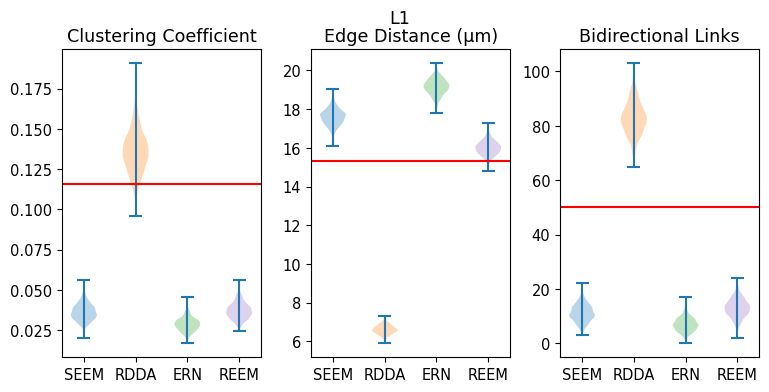

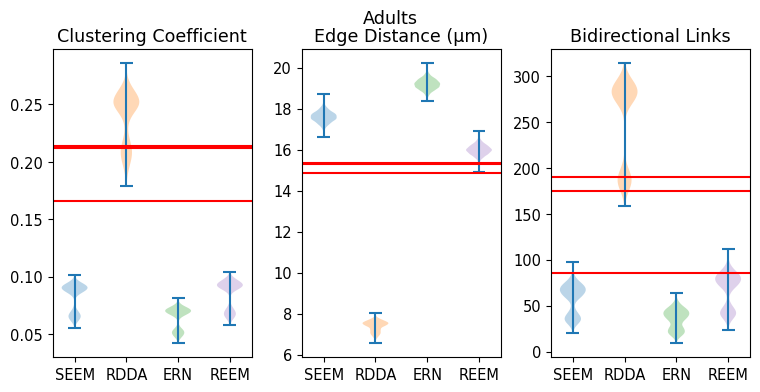

In [ ]:
%store -r SEEM_Array_Witvliet_Rand SEEM_White_Rand

graphs_L1 = [SEEM_Array_Witvliet[0], RDDAM_Graphs_W1, rand_Graphs_W1, SEEM_Array_Witvliet_Rand[0]]

seemAdult = SEEM_Array_Witvliet[6] + SEEM_Array_Witvliet[7] + SEEM_White
rddaAdult = RDDAM_Graphs_W7 + RDDAM_Graphs_W8 + RDDAM_Graphs_White
randAdult = rand_Graphs_W7 + rand_Graphs_W8 + rand_Graphs_White
reemAdult = SEEM_Array_Witvliet_Rand[6] + SEEM_Array_Witvliet_Rand[7] + SEEM_White_Rand

graphs_adult = [seemAdult, rddaAdult, randAdult, reemAdult]

averages_L1 = [G_W1]
averages_adult = [G_W7, G_W8, G_White]

violinPlot(graphs_L1, averages_L1, 'L1')

plt.show()

violinPlot(graphs_adult, averages_adult, 'Adults')